## Desafio 1

> Atenção: este notebook foi desenhado para funcionar no **Google Colab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-colab```.


Crie uma função para transformar uma imagem colorida em um desenho (sketch) com fundo branco e traços na cor preta.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [1]:
!rm -rf fiap-ml-visao-computacional/

In [2]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Cloning into 'fiap-ml-visao-computacional'...
remote: Enumerating objects: 11574, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 11574 (delta 63), reused 95 (delta 33), pack-reused 11432
Receiving objects: 100% (11574/11574), 1005.24 MiB | 28.90 MiB/s, done.
Resolving deltas: 100% (514/514), done.
Checking out files: 100% (10578/10578), done.


Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [3]:
%cd fiap-ml-visao-computacional/aula-3-segmentacao/desafio-1/

/content/fiap-ml-visao-computacional/aula-3-segmentacao/desafio-1


Importação de bibliotecas.

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 2. Solução

Construindo função que receberá uma imagem em RGB, converterá em escala de cinza e posteriormente retornará com bordas identificadas invertidas.

In [ ]:
def obter_bordas(imagem):
    # IMPLEMENTAR
    return imagem_borda

Text(0.5, 1.0, 'Original')

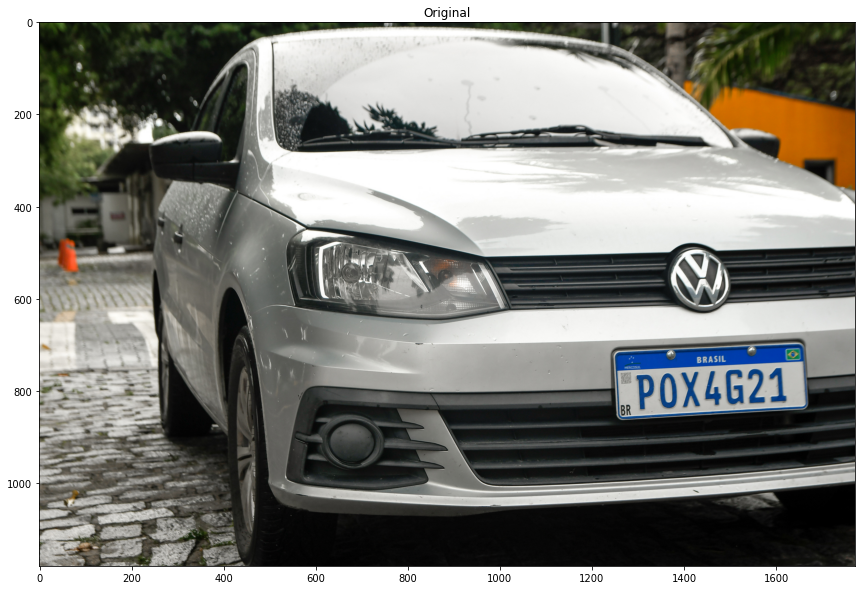

In [6]:
imagem = cv2.imread("imagens/placa.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Original")

Text(0.5, 1.0, 'Gray')

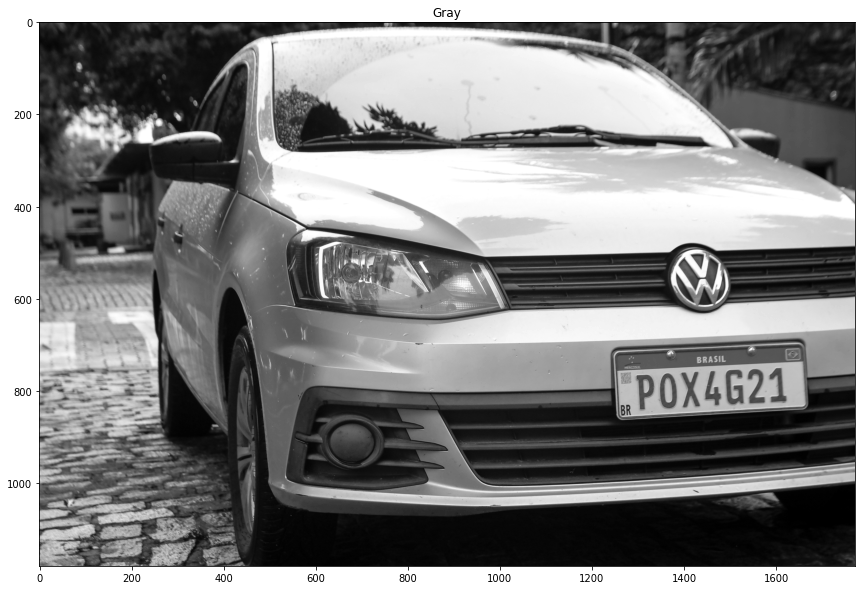

In [7]:
# IMPLEMENTAR
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(imagem,  cmap="gray")
plt.title("Gray")


Text(0.5, 1.0, 'Limiarização binária')

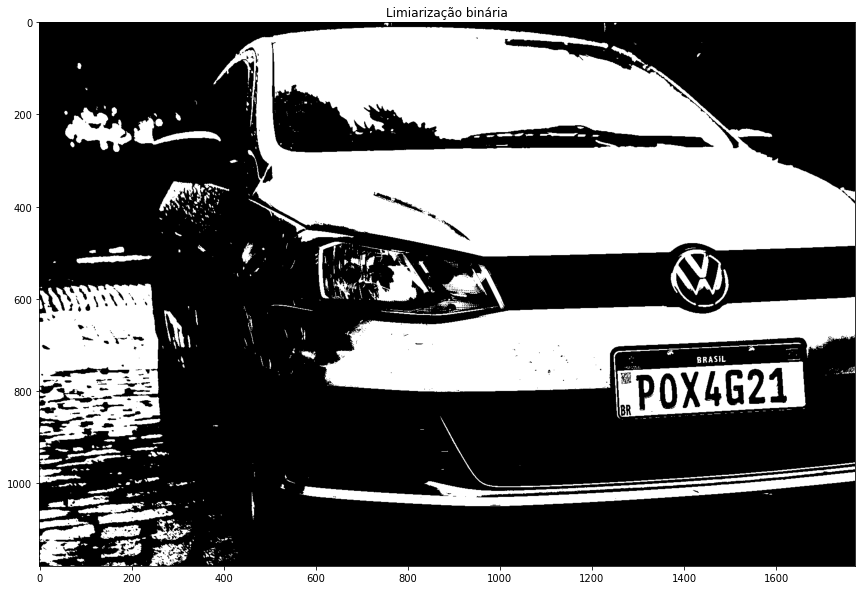

In [8]:
ret, imagem_limiarizada = cv2.threshold(imagem, 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.imshow(imagem_limiarizada, cmap="gray")
plt.title("Limiarização binária")

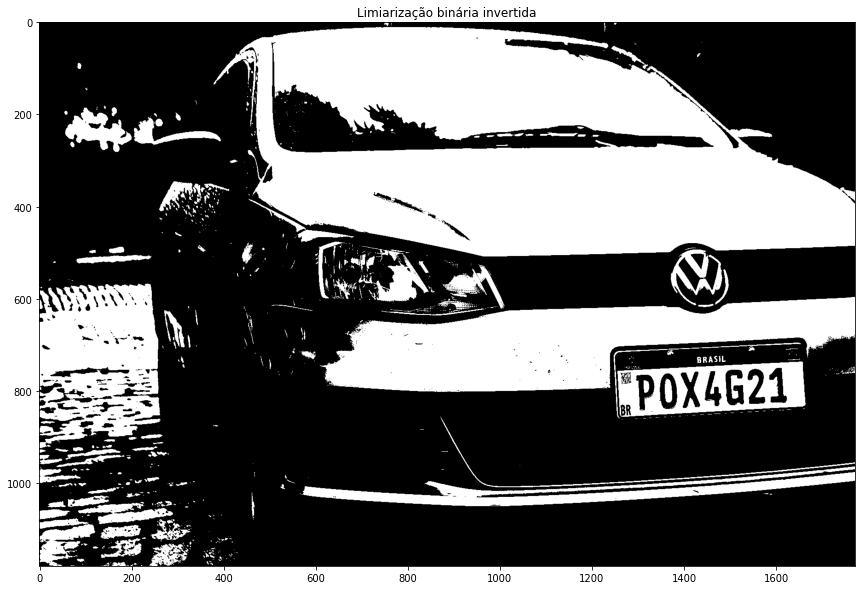

In [11]:
ret, imagem_limiarizada = cv2.threshold(imagem, 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.title("Limiarização binária invertida")
plt.imshow(imagem_limiarizada, cmap="gray")

In [15]:
imagem_suav_mediana = cv2.medianBlur(imagem, 3)

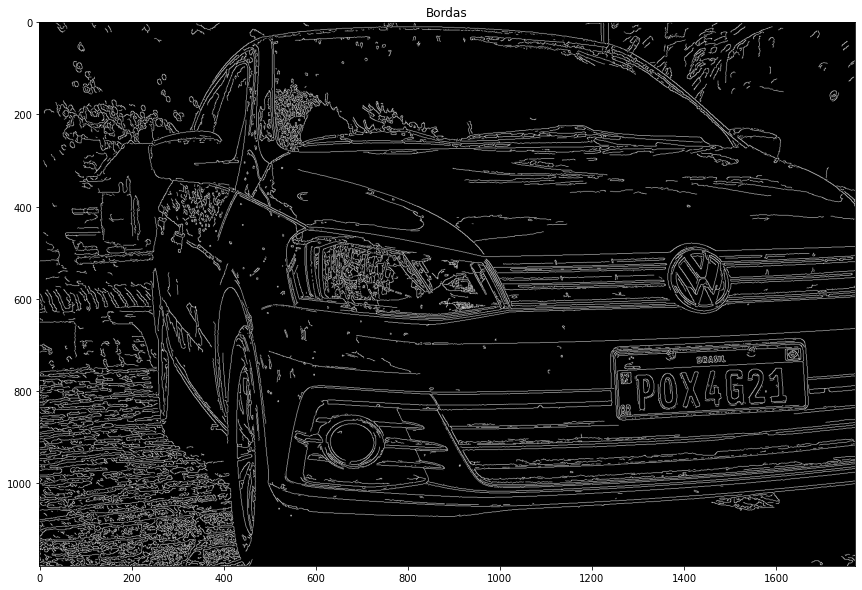

In [16]:
borda_canny = cv2.Canny(imagem_suav_mediana, 40, 80)

plt.figure(figsize=(20, 10))
plt.title("Bordas")
plt.imshow(borda_canny, cmap="gray")

### 2. Obtendo imagem a da câmera

Este método é de uso exclusivo do Colab, uma vez que não temos acesso direto a câmera do dispositivo.

Obtido dos [snippets avançados](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq) do Google Colab.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Função que obtem a foto da câmera do navegador e salva em uma pasta determinada.

In [ ]:
from IPython.display import Image
try:
  filename = take_photo("imagens/foto.jpg")
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
imagem = cv2.imread("imagens/foto.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# IMPLEMENTAR